Group #3 ICG Group Project

In [90]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# data=pd.read_csv('company3.csv')
file_path = '/content/drive/My Drive/Colab Notebooks/Time_Series/company3.csv'
data = pd.read_csv(file_path)

In [93]:
data.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,1,1,32452.79,False
1,2010-02-12,1,1,50360.71,True
2,2010-02-19,1,1,28504.70,False
3,2010-02-26,1,1,23033.73,False
4,2010-03-05,1,1,29662.30,False


In [94]:
data.describe()

,Store,Dept,Weekly_Sales
count,14603.000000,14603.000000,14603.000000
mean,5.766144,29.193043,14067.041557
std,1.955651,30.650536,16407.657180
min,1.000000,1.000000,-4988.940000
25%,5.000000,4.000000,3039.790000
50%,7.000000,17.000000,8205.250000
75%,7.000000,48.000000,20993.275000
max,7.000000,99.000000,266480.630000


In [95]:
data.isnull().sum()

Date            0
Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14603 entries, 0 to 14602
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          14603 non-null  object 
 1   Store         14603 non-null  int64  
 2   Dept          14603 non-null  int64  
 3   Weekly_Sales  14603 non-null  float64
 4   IsHoliday     14603 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 470.7+ KB


In [97]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.set_index('Date',inplace=True)


In [98]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,32452.79,False
2010-02-12,1,1,50360.71,True
2010-02-19,1,1,28504.70,False
2010-02-26,1,1,23033.73,False
2010-03-05,1,1,29662.30,False


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14603 entries, 2010-02-05 to 2012-08-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         14603 non-null  int64  
 1   Dept          14603 non-null  int64  
 2   Weekly_Sales  14603 non-null  float64
 3   IsHoliday     14603 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 470.6 KB


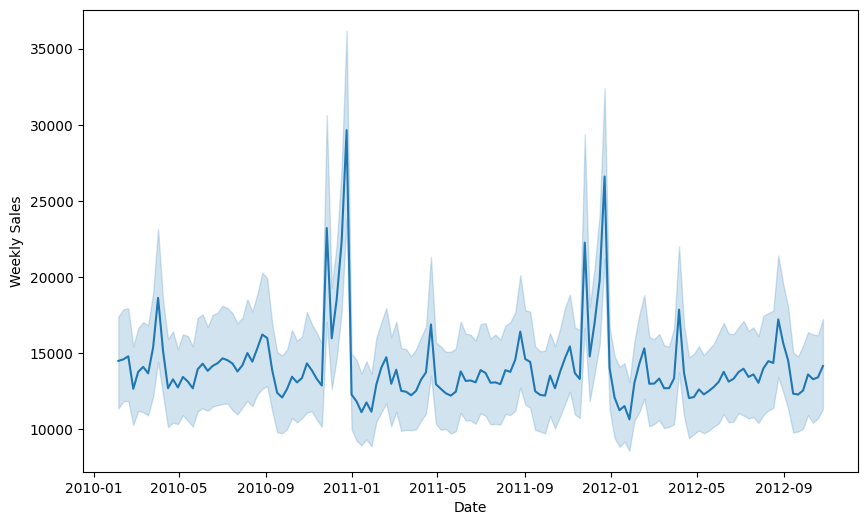

In [100]:
plt.figure(figsize=(10,6))
sb.lineplot(data=data,x='Date',y='Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

Time series analysis for store=1 and depatment=1

In [132]:
store1_1=data[(data['Store']==2) &(data['Dept']==4)]
store1_1


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,2,4,28346.73,False
2010-02-12,2,4,27765.68,True
2010-02-19,2,4,27103.50,False
2010-02-26,2,4,24185.32,False
2010-03-05,2,4,30472.86,False
...,...,...,...,...
2012-09-28,2,4,29296.18,False
2012-10-05,2,4,32051.59,False
2012-10-12,2,4,31105.20,False


In [133]:
store11=store1_1.drop(['Store','Dept'],axis=1)
store11

,Weekly_Sales,IsHoliday
Date,,
2010-02-05,28346.73,False
2010-02-12,27765.68,True
2010-02-19,27103.50,False
2010-02-26,24185.32,False
2010-03-05,30472.86,False
...,...,...
2012-09-28,29296.18,False
2012-10-05,32051.59,False
2012-10-12,31105.20,False


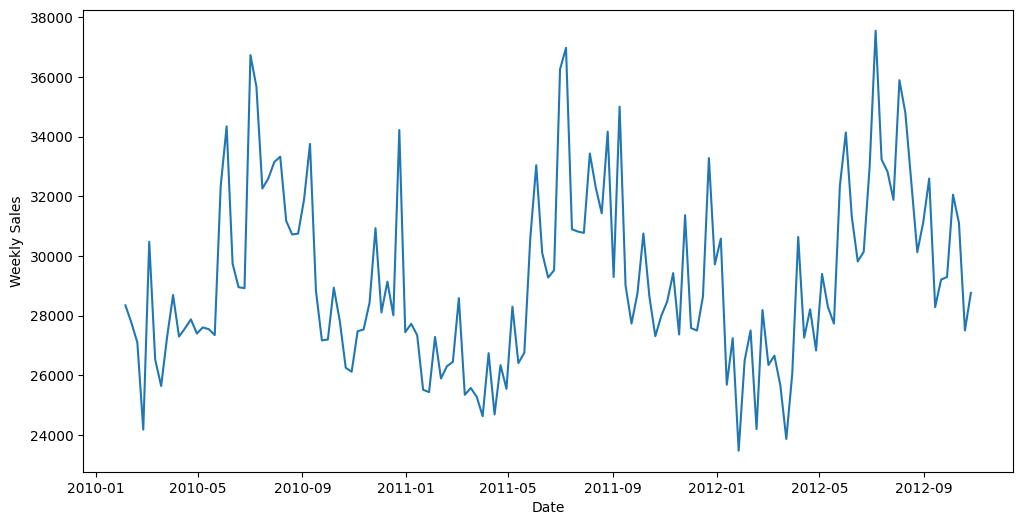

In [134]:

plt.figure(figsize=(12, 6))
sb.lineplot(data=store11, x='Date', y='Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

plt.show()

In [135]:
store11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
 1   IsHoliday     143 non-null    bool   
dtypes: bool(1), float64(1)
memory usage: 2.4 KB


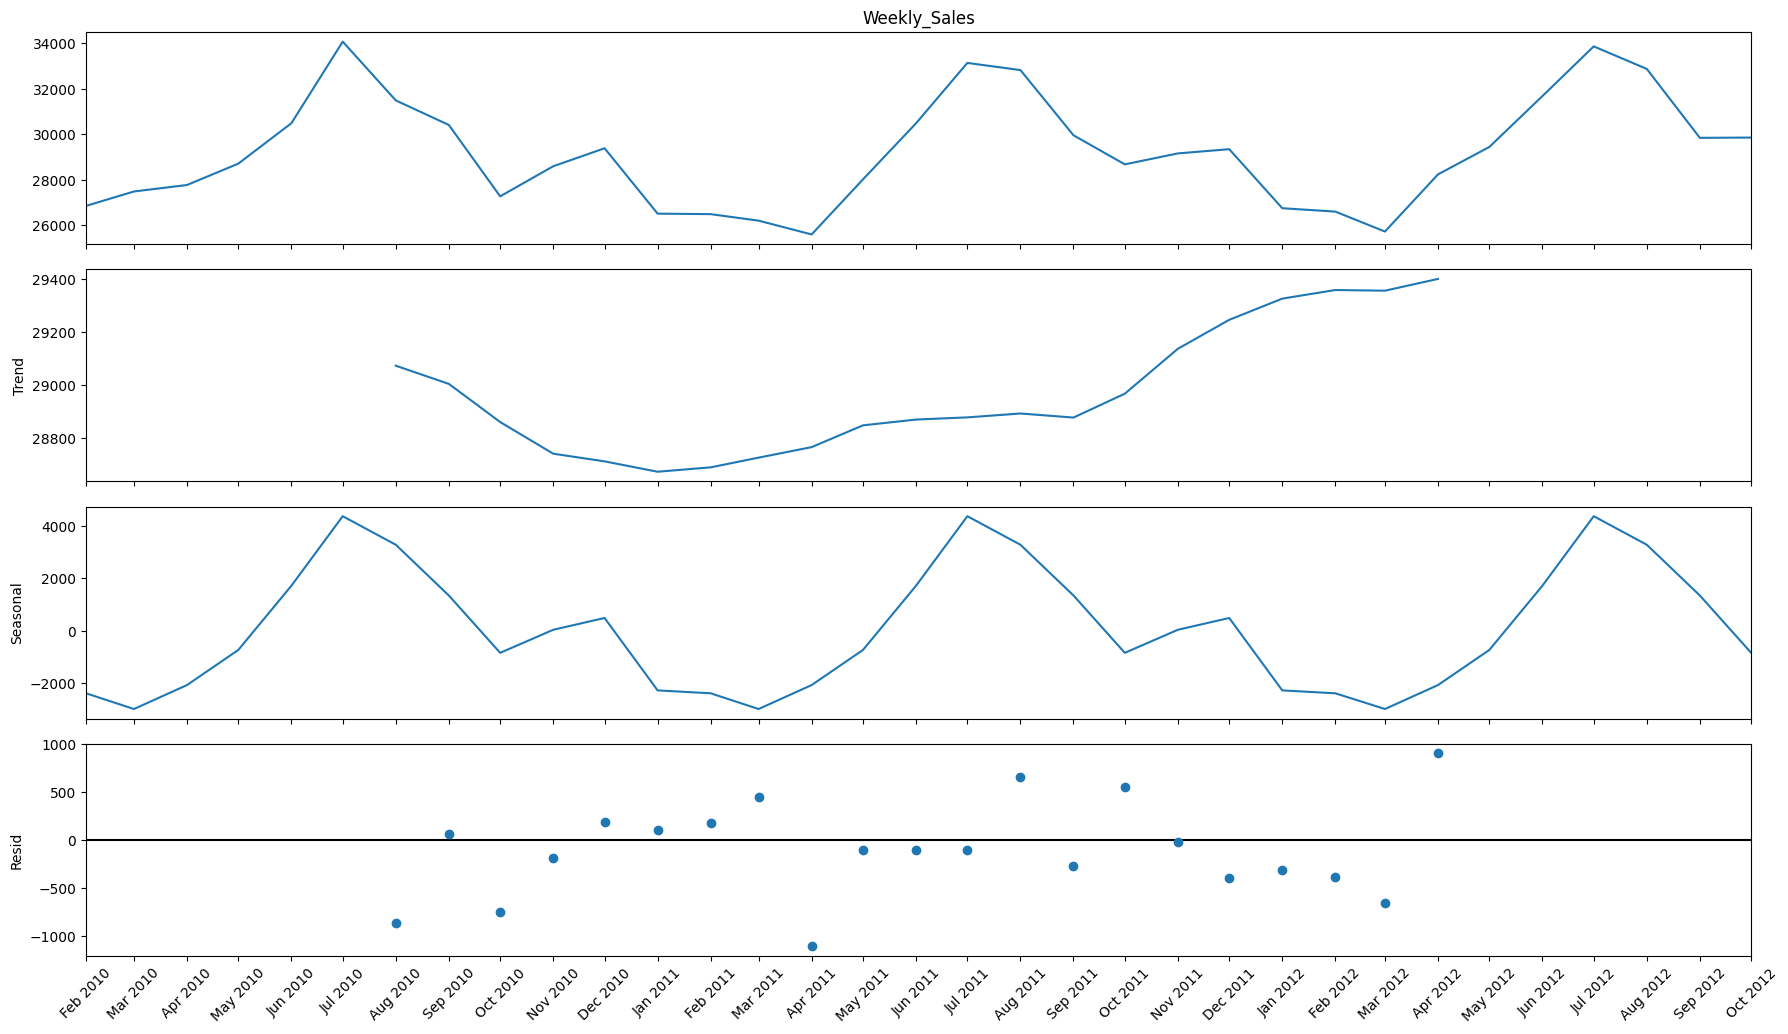

In [136]:
from matplotlib.dates import MonthLocator, DateFormatter
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
store11_Monthly_Sales = store11['Weekly_Sales'].resample('MS').mean()
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(store11_Monthly_Sales, model='additive')
fig = decomposition.plot()
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()


In [137]:
adft = adfuller(store11_Monthly_Sales,autolag="AIC")
output_store11 = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","No. of observation used",
"critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_store11)

      Values                   Metric
0  -0.574896          Test Statistics
1   0.876554                  p-value
2  10.000000         No. of lags used
3  22.000000  No. of observation used
4  -3.769733      critical value (1%)
5  -3.005426      critical value (5%)
6  -2.642501     critical value (10%)


<Figure size 11000x500 with 0 Axes>

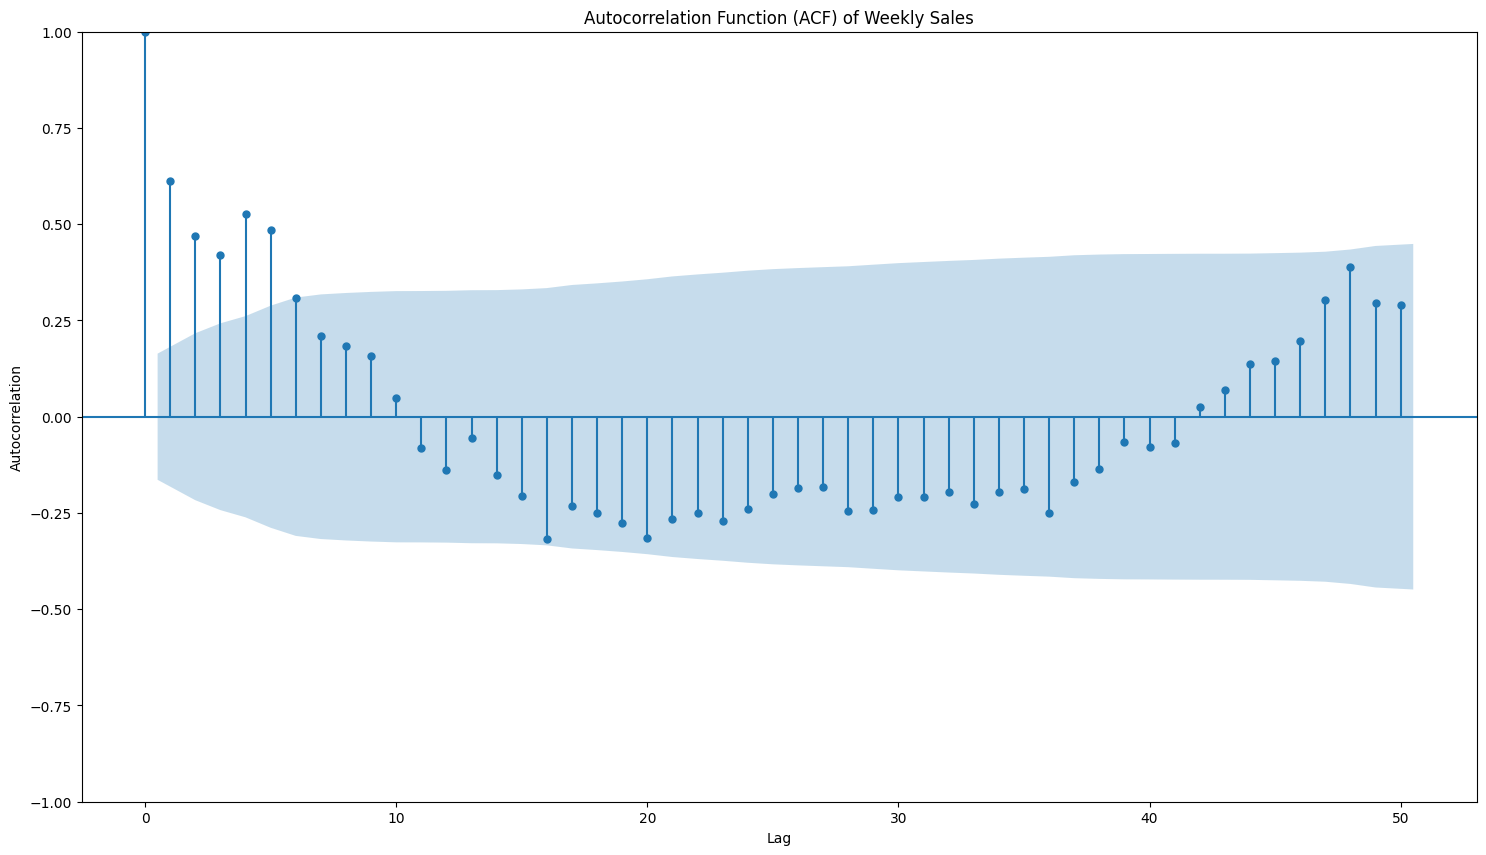

In [138]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(110, 5))
plot_acf(store11['Weekly_Sales'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Weekly Sales')
plt.show()

In [139]:
!pip install pmdarima

P=0

In [140]:
# import pmdarima as pm
# smodel = pm.auto_arima(store11['Weekly_Sales'], start_p=0, start_q=0,
#                          test='adf',
#                          max_p=3, max_q=3, m=12,
#                          start_P=0, seasonal=True,
#                          d=None, D=1, trace=True,
#                          error_action='ignore',
#                          suppress_warnings=True,
#                          stepwise=True)

# smodel.summary()


In [141]:
# Future_predictions=smodel.predict(n_periods=26)


In [142]:
# store11pred=pd.DataFrame( Future_predictions,columns=['Weekly_Sales'])
# store11pred


In [143]:
# plt.figure(figsize=(12,6))
# sb.lineplot(data=store11 , x=store11.index,y="Weekly_Sales",label='Weekly Sales' )
# sb.lineplot(data=store11pred,x=store11pred.index,y='Weekly_Sales',label='PREDICTED')
# plt.xlabel('Date')
# plt.ylabel('Weekly Sales')
# plt.show()

In [144]:
from sklearn.metrics import r2_score


In [145]:
train_size = int(len(store11) * 0.8)  # 80% training data, 20% testing data
train, test = store11[:train_size], store11[train_size:]


In [146]:
smodel = pm.auto_arima(train['Weekly_Sales'], start_p=0, start_q=0,
                       test='adf', max_p=3, max_q=2, m=12,
                       start_P=0, seasonal=True, d=None, D=1,
                       trace=True, error_action='ignore',
                       suppress_warnings=True, stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1926.235, Time=0.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1970.431, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1938.209, Time=0.78 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1919.700, Time=0.93 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1961.070, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1921.474, Time=2.06 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1921.488, Time=2.74 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1937.447, Time=0.38 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=6.86 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1925.294, Time=0.98 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1919.962, Time=1.87 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1922.141, Time=0.97 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1923.567, Time=2.37 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1920.194, Time=1.65 sec

Best model:  ARIMA(0,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -956.850
Date:                            Sun, 14 Jul 2024   AIC                           1919.700
Time:                                    08:53:08   BIC                           1927.546
Sample:                                02-05-2010   HQIC                          1922.876
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3179      0.085     -3.724      0.000      -0.485      -0.151
ma.S.L12      -0.7265      0.084     -8.641      0.000      -0.891      -0.562
sigma2      9.243e+06   1.43e+06      6.445      0.000    6.43e+06    1.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.71   Prob(JB):                         0.65
Heteroskedasticity (H):               0.75   Skew:                             0.22
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
n_periods = len(test)
test_predictions = smodel.predict(n_periods=n_periods)

In [158]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [159]:
r2 = r2_score(test['Weekly_Sales'],   test_predictions)
mape = mean_absolute_percentage_error(test['Weekly_Sales'], test_predictions)
print(f'R² Score: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')

R² Score: -0.18525204820315122
Mean Absolute Percentage Error: 0.07192226893998441


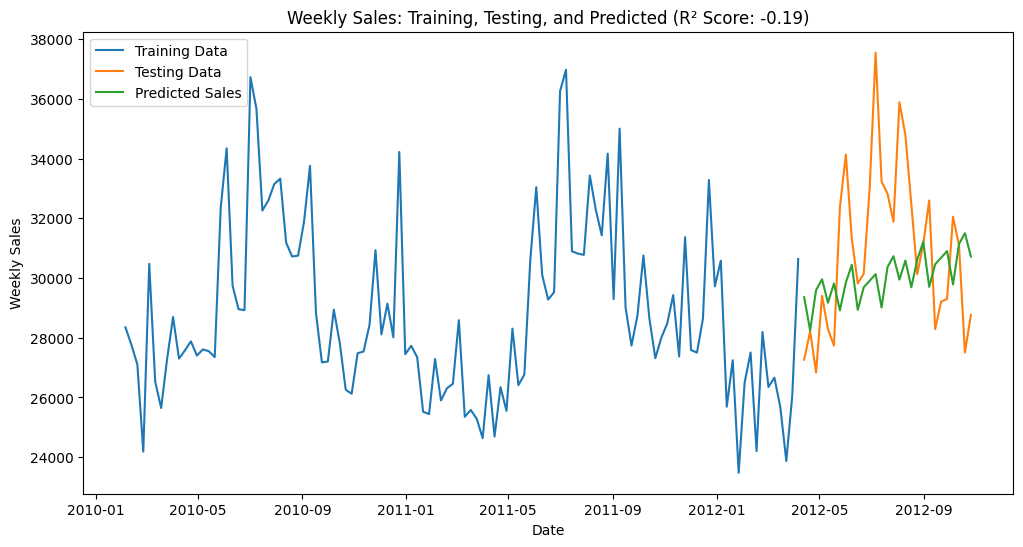

In [150]:
plt.figure(figsize=(12, 6))
sb.lineplot(data=train, x=train.index, y="Weekly_Sales", label='Training Data')
# sb.lineplot(data=test, x=test.index, y="Weekly_Sales", label='Testing Data')
sb.lineplot(data=test_predictions,label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title(f'Weekly Sales: Training, Testing, and Predicted (R² Score: {r2:.2f})')
plt.legend()
plt.show()

In [151]:
Future_26_weeks_predictions = smodel.predict(n_periods=26)

future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(weeks=1), periods=26, freq='W')

future_predictions_df = pd.DataFrame(Future_26_weeks_predictions, index=future_dates, columns=['Future_Predicted_Weekly_Sales'])


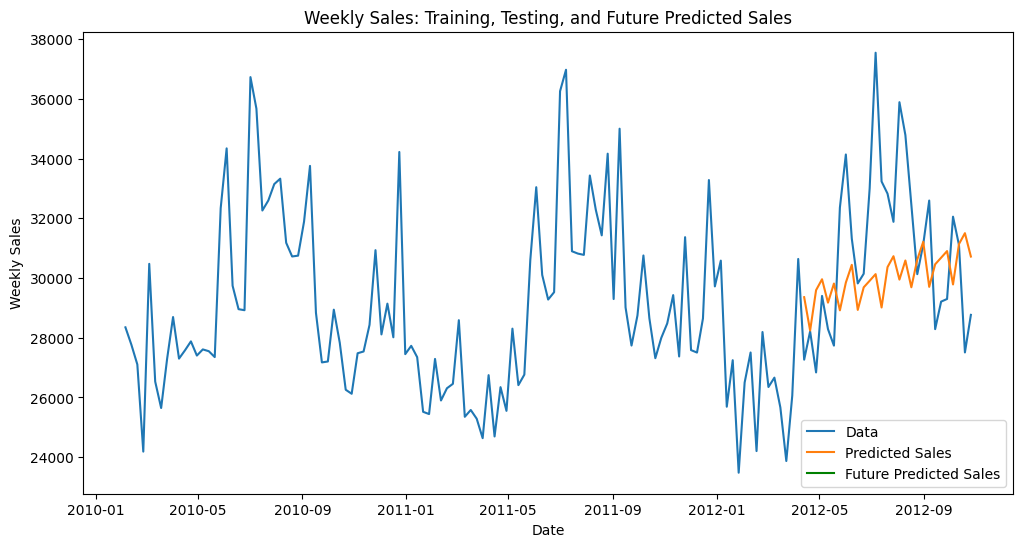

In [155]:

plt.figure(figsize=(12, 6))
sb.lineplot(data=store11, x=store11.index, y="Weekly_Sales", label='Data')
# sb.lineplot(data=test, x=test.index, y="Weekly_Sales", label='Testing Data')
sb.lineplot(data=test_predictions, label='Predicted Sales')
sb.lineplot(data=future_predictions_df, x=future_predictions_df.index, y='Future_Predicted_Weekly_Sales', label='Future Predicted Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales: Training, Testing, and Future Predicted Sales')
plt.legend()
plt.show()